# Problem 4
### 1.

In [37]:
import numpy as np
import random

def coins_w_sensor(sims):

    flips = [(random.choice(['H', 'T']), random.choice(['H', 'T'])) for _ in range(sims)]   # Simulate two coin flips
    pairs = ['equal' if flip[0] == flip[1] else 'different' for flip in flips]  # Determine if they are equal or different, instead of 0/1
    #print(pairs)

    reports = []
    for i in range(len(pairs)):
        R = random.random()
        #print(R)
        if R <= 0.9:    # 90% chance to report correctly
            reports.append(pairs[i]) # Keep same result
        else:
            reports.append('equal' if pairs[i] == 'different' else 'different') # Flip result

    return pairs, reports

pair, report = coins_w_sensor(10**6) # 10^6 simulations
#print(report)

### 2.

In [41]:
print(f"P(R=1) (report equal) = {report.count('equal') / len(report)}")
print(f"P(equal | R=1) = {sum(1 for i in range(len(report)) if report[i] == 'equal' and pair[i] == 'equal') / report.count('equal')}")

P(R=1) (report equal) = 0.500226
P(equal | R=1) = 0.89933550035384


### 3.

The differences between the values above and the analytic values found in Part I are very close, differing absolutely by only:

In [42]:
print(f"Absolute difference to P(R=1): {np.abs(0.5 - report.count('equal') / len(report))}")
print(f"Absolute difference to P(equal | R=1): {np.abs(0.9 - sum(1 for i in range(len(report)) if report[i] == 'equal' and pair[i] == 'equal') / report.count('equal'))}")

Absolute difference to P(R=1): 0.00022599999999994846
Absolute difference to P(equal | R=1): 0.0006644996461599995


### 4.

Conditioning on a noisy report can change posterior probabibilities significantly even with a low noise rate because the probability space shifts to dealing with new events. In our example, the original probability is 50/50, but once we knew that one of the events had occurred, the test was (still) 90% accurate. Even if the original probability was much lower, say 1%, once the report has occurred, we are now considering the probability of true positives versus false positives, which is NOT the original probability space of the event in the first place.

# Problem 5

Using random uniform distributions, the value of the randomly generated number will serve as the determining factor for passing or failing each stage of inspection. Lower than the defined probability and it will pass, higher and it will fail.

P(R) = 0.0
P(R) = 0.0
P(R) = 0.125
P(R) = 0.125
P(R) = 0.03125
P(R) = 0.125
P(R) = 0.0859375
P(R) = 0.06640625
P(R) = 0.087890625
P(R) = 0.087890625
P(R) = 0.09130859375
P(R) = 0.08544921875
P(R) = 0.09375
P(R) = 0.08740234375
P(R) = 0.091888427734375
P(R) = 0.09124755859375
P(R) = 0.0914764404296875
P(R) = 0.09210205078125
P(R) = 0.09096145629882812
P(R) = 0.09159374237060547
P(R) = 0.0917510986328125
P(R) = 0.0919337272644043
P(R) = 0.0916968584060669
P(R) = 0.09184885025024414


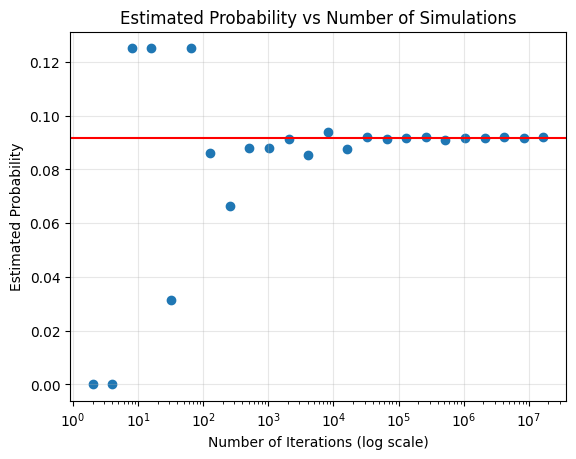

In [ ]:
import random
import matplotlib.pyplot as plt

def two_stage_screen(init_good_prob):

    item = '' 
    fail = False

    R1 = random.random()
    if R1 <= init_good_prob: # initial probability for good
        item = 'good'
    else:
        item = 'bad'

    # Stage 1 screening (all items)
    if item == 'good':
        R2a = random.random() # Use different random number for good and bad for clarity
        if R2a <= 0.08:
            fail = True
    else: # item == 'bad'
        R2b = random.random()
        if R2b <= 0.95:
            fail = True

    # Stage 2 screening
    if fail: # Only proceed to stage 2 if failed stage 1
        if item == 'good':
            R3a = random.random()
            if R3a <= 0.98: # Pass probability (not fail)
                fail = False # Switch to pass
        else: # item == 'bad'
            R3b = random.random()
            if R3b <= 0.05:
                fail = False


    return item, fail



sims = [2**i for i in range(1, 25)]
probabilities = []
for i in range(len(sims)):
    fail_count = 0
    for sim in range(sims[i]):
        item, fail = two_stage_screen(0.9) # Change initial P(G) here
        if fail:
            fail_count += 1
            #print(f"Item: {item}, Failed screening: {fail}")

    probabilities.append(fail_count / sims[i])
    print(f"P(R) = {fail_count / sims[i]}")

# Plotting estimated probabilities vs number of iterations
plt.figure(1)
plt.scatter(sims, probabilities)
plt.axhline(y=0.09169, color='r', label='Analytical P(R)') # 0.09169 is analytical value for P(R) with P(G)=0.9 from part 1
plt.xscale('log')
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Estimated Probability')
plt.title('Estimated Probability vs Number of Simulations')
plt.grid(True, alpha=0.3)
plt.show()

P(R) = 0.5
P(R) = 0.75
P(R) = 0.375
P(R) = 0.375
P(R) = 0.40625
P(R) = 0.421875
P(R) = 0.4296875
P(R) = 0.5
P(R) = 0.43359375
P(R) = 0.451171875
P(R) = 0.45703125
P(R) = 0.450439453125
P(R) = 0.4429931640625
P(R) = 0.45892333984375
P(R) = 0.4554443359375
P(R) = 0.449798583984375
P(R) = 0.45209503173828125
P(R) = 0.4515266418457031
P(R) = 0.45223045349121094
P(R) = 0.4520759582519531
P(R) = 0.4518551826477051
P(R) = 0.4520692825317383
P(R) = 0.4520838260650635
P(R) = 0.45213931798934937


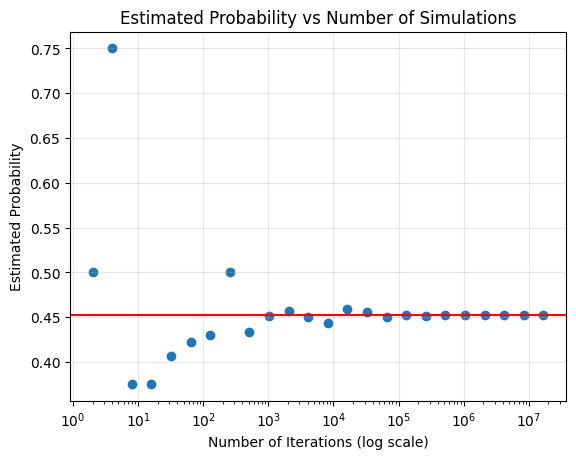

In [53]:
sims = [2**i for i in range(1, 25)] 
probabilities = []
for i in range(len(sims)):
    fail_count = 0
    for sim in range(sims[i]):
        item, fail = two_stage_screen(0.5) # Change initial good item probability to 0.5
        if fail:
            fail_count += 1
            #print(f"Item: {item}, Failed screening: {fail}")

    probabilities.append(fail_count / sims[i])
    print(f"P(R) = {fail_count / sims[i]}")

# Plotting estimated probabilities vs number of iterations
plt.figure(1)
plt.scatter(sims, probabilities)
plt.axhline(y=0.45205, color='r', label='Analytical P(R)') # Calculated analytically 0.08 * 0.02 * 0.5 + 0.95 * 0.95 * 0.5
plt.xscale('log')
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Estimated Probability')
plt.title('Estimated Probability vs Number of Simulations')
plt.grid(True, alpha=0.3)
plt.show()